In [1]:
# Dependencies
import pandas as pd
import numpy as np
import warnings
from numpy import savetxt
warnings.simplefilter('ignore')

In [2]:
# Load csv files into dataframe
train = pd.read_csv("Resources/train.csv")
test = pd.read_csv("Resources/test.csv")

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train['Cabin'] = train['Cabin'].str.replace('[^0-9]','')
test['Cabin'] = test['Cabin'].str.replace('[^0-9]','')
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,3,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,4,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,0,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,1,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,5,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,1496,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,296,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,297,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [5]:
# Find the structure of data set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
# Find aggregate values of dataset
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
# Find unique values of non-numeric columns
print(train.Destination.unique())
print(len(train.Cabin.unique()))
print(train.HomePlanet.unique())

['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
1818
['Europa' 'Earth' 'Mars' nan]


In [8]:
# Find number of null values in the train data set
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
# Find number of null values in the test data set
test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [10]:
# Remove null values with 0, median value and 'False'
age_median = train.Age.median()
train.Age.fillna(age_median, inplace = True)
train.fillna(0, inplace = True)

In [11]:
test_age_median = test.Age.median()
test.Age.fillna(test_age_median, inplace = True)
test.fillna(0, inplace = True)

In [12]:
# Remove columns Name, PassengerID which is not relevent 
train_df = train.drop(columns = ['Name','PassengerId'])
test_df = test.drop(columns = ['Name','PassengerId'])

In [13]:
# Fill boolean values with 1, 0 in train_df features
train_df.CryoSleep.replace({True:1,False:0}, inplace = True)
train_df.Transported.replace({True:1,False:0}, inplace = True)

# train_df.VIP.replace({True:1,False:0}, inplace = True)
# Replace categorical destination values with 0 1 2 3
# train_df.Destination.replace({'TRAPPIST-1e':2, 'PSO J318.5-22':3, 
#                               '55 Cancri e':1,None:4}, inplace = True)
# Dropping features Destination and VIP as it has lesser dependency on target variable
train_df.drop(columns=['Destination','VIP'], inplace = True)

# Replace categorical Home planet values with 0 1 2 3
train_df.HomePlanet.replace({'Europa':1,'Earth':3,'Mars':2,
                             None:0}, inplace = True)


train_df['Transported']=train_df["Transported"].astype("int")
train_df.head()

,HomePlanet,CryoSleep,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,0,39.0,0.0,0.0,0.0,0.0,0.0,0
1,3,0,0,24.0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,0,58.0,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,0,33.0,0.0,1283.0,371.0,3329.0,193.0,0
4,3,0,1,16.0,303.0,70.0,151.0,565.0,2.0,1


In [14]:
# Fill boolean values with 1, 0 in train_df features
test_df.CryoSleep.replace({True:1,False:0}, inplace = True)
# test_df.VIP.replace({True:1,False:0}, inplace = True)

# Replace categorical destination values with 0 1 2 3
# test_df.Destination.replace({'TRAPPIST-1e':2, 'PSO J318.5-22':3, 
#                               '55 Cancri e':1,None:4}, inplace = True)
# Dropping features Destination and VIP as it has lesser dependency on target variable
test_df.drop(columns=['Destination', 'VIP'], inplace = True)

# Replace categorical Home planet values with 0 1 2 4
test_df.HomePlanet.replace({'Europa':1,'Earth':3,'Mars':2,
                             None:0}, inplace = True)
test_df.head()

,HomePlanet,CryoSleep,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,3,1,3,27.0,0.0,0.0,0.0,0.0,0.0
1,3,0,4,19.0,0.0,9.0,0.0,2823.0,0.0
2,1,1,0,31.0,0.0,0.0,0.0,0.0,0.0
3,1,0,1,38.0,0.0,6652.0,0.0,181.0,585.0
4,3,0,5,20.0,10.0,0.0,635.0,0.0,0.0


<AxesSubplot:>

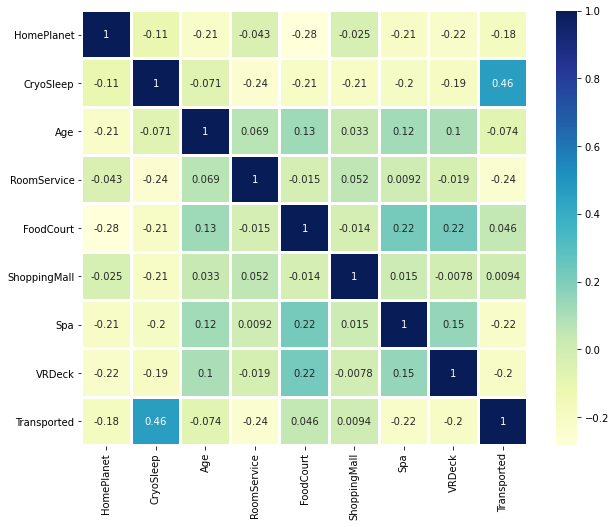

In [15]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# plot correlation matrix graph
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot = True, 
            linewidth = 2, cmap="YlGnBu")

In [16]:
# Seperate dependent variables and independent variable
y = train_df.loc[:, train_df.columns == 'Transported']
X = train_df.loc[:, train_df.columns !='Transported']
print(X.shape)
print(test_df.shape)

(8693, 9)
(4277, 9)


In [17]:
# Split X and y using train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.60, random_state=30)

# Get shape of train test data
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (5215, 9)
train size y :  (5215, 1)
test size X :  (3478, 9)
test size y :  (3478, 1)


In [18]:
# Check the distribution of labels
y_train.value_counts(normalize = True)

Transported
1              0.502013
0              0.497987
dtype: float64

In [19]:
# from xgboost import XGBClassifier

# xg_model = XGBClassifier(booster='gbtree', enable_categorical=True,
#                         learning_rate = 1, n_estimators = 1000, max_depth=5,
#                         gamma=0, subsample = 0.8,colsample_bynode = 0.8,
#                         objective = 'binary:logistic', nthread=4,
#                         scale_pos_weight = 1, seed = 27, num_parallel_tree=0.7,
#                         num_boost_round=1, objective = 'binary:logistic' )
# X_train=X_train.astype("category")
# xg_model.fit(X_train, y_train)

# from sklearn.metrics import mean_absolute_error

# predictions = xg_model.predict(X_test)
# print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

## Applying Standard Scaler

In [20]:
from sklearn.preprocessing import StandardScaler
 
ss = StandardScaler()

# Fit and transform the data
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

## Applying Robest Scaler

In [37]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_rs = scaler.fit_transform(X_train)
X_test_rs = scaler.fit_transform(X_test)

## Logistic Regression Model

In [38]:
# Scaled Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight = 'balanced', solver='liblinear',
                       multi_class='auto',C=10, penalty='l1')
lr.fit(X_train_scaled, y_train)
print(lr.intercept_)
print(lr.coef_)
# Model Accuracy
print(f"Training Data Score: {lr.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lr.score(X_test_scaled, y_test)}")
y_pred = lr.predict(test_df)

spaceship_df = pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred})
spaceship_df['Transported'] = spaceship_df.Transported.map({0:False, 1:True})
# save predicted data in csv file
spaceship_df.to_csv('spaceship_lr.csv', index = False)

[-0.35153794]
[[-0.62688502  0.67748331  0.01592778 -0.10469959 -0.91602248  0.9780764
   0.38983885 -1.83830108 -1.90115334]]
Training Data Score: 0.7789069990412272
Testing Data Score: 0.7852213916043703


## Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix

# Confusion matrix of logistic regression model
y_pred = lr.predict(X_test_scaled)
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[1302,  416],
       [ 331, 1429]], dtype=int64)

## Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

# Train and fit the model
dtc = DecisionTreeClassifier(max_depth=6, random_state=1,
                             min_samples_split = 5,min_samples_leaf=12)
dtc.fit(X_train_rs, y_train)

# Model Accuracy
print(f'Training score: {dtc.score(X_train_rs, y_train)}')
print(f'Testing score: {dtc.score(X_test_rs, y_test)}')
y_pred  =  dtc.predict(test_df)
print(y_pred)

spaceship_df = pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred})
spaceship_df['Transported'] = spaceship_df.Transported.map({0:False, 1:True})
# save predicted data in csv file
spaceship_df.to_csv('spaceship_dtc.csv', index = False)

Training score: 0.7858101629913711
Testing score: 0.7725704427832087
[0 0 1 ... 0 1 0]


## Random Forest Classification

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Train and fit the model
rfc = RandomForestClassifier(n_estimators=81, 
                             random_state=1,min_samples_leaf=12)

rfc.fit(X_train, y_train)

importance = rfc.feature_importances_

print(f'Training score: {rfc.score(X_train, y_train)}')
print(f'Testing score: {rfc.score(X_test, y_test)}')
y_pred_rfc  =  rfc.predict(test_df)

spaceship_df = pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred_rfc})
spaceship_df['Transported'] = spaceship_df.Transported.map({0:False, 1:True})
spaceship_df.to_csv('spaceship_rfc.csv', index = False)
y_pred_rfc

Training score: 0.8299137104506232
Testing score: 0.8001725129384704


array([1, 0, 1, ..., 1, 1, 0])

Feature: 0, Score: 0.08040
Feature: 1, Score: 0.18389
Feature: 2, Score: 0.07739
Feature: 3, Score: 0.06717
Feature: 4, Score: 0.14035
Feature: 5, Score: 0.09941
Feature: 6, Score: 0.07867
Feature: 7, Score: 0.13703
Feature: 8, Score: 0.13569


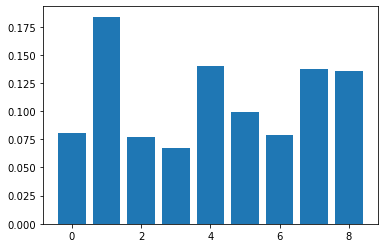

In [49]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Support Vector Machine

In [54]:
from sklearn.svm import SVC 
# Train and fit the model
svm_model = SVC(kernel='rbf', C=9)
svm_model.fit(X_train_rs, y_train)

# importance = svm_model.feature_importances_
# Model Accuracy
print(f"Training Data Score: {svm_model.score(X_train_rs, y_train)}")
print(f"Testing Data Score: {svm_model.score(X_test_rs, y_test)}")
y_pred_svm=svm_model.predict(test_df)

spaceship_df = pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred_svm})
spaceship_df['Transported'] = spaceship_df.Transported.map({0:False, 1:True})
spaceship_df.to_csv('spaceship_svm.csv', index = False)
y_pred

Training Data Score: 0.7921380632790028
Testing Data Score: 0.7938470385278896


array([0, 0, 1, ..., 0, 1, 0])

## CatBoostClassifier

In [74]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(iterations=100)
cbc.fit(X_train, y_train)

# Model Accuracy
print(f'Training Score: {cbc.score(X_train, y_train)}')
print(f'Testing Score: {cbc.score(X_test, y_test)}')
y_pred_ada  =  cbc.predict(test_df)
y_pred_ada.shape
spaceship_df = pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred_ada})
spaceship_df['Transported'] = spaceship_df.Transported.map({0:False, 1:True})
# save predicted data in csv file
spaceship_df.to_csv('spaceship_cbc.csv', index = False)

Learning rate set to 0.172267
0:	learn: 0.6403367	total: 19.4ms	remaining: 1.92s
1:	learn: 0.6078634	total: 31.2ms	remaining: 1.53s
2:	learn: 0.5767654	total: 38.2ms	remaining: 1.23s
3:	learn: 0.5522762	total: 45.4ms	remaining: 1.09s
4:	learn: 0.5358810	total: 48.7ms	remaining: 925ms
5:	learn: 0.5206408	total: 52.9ms	remaining: 829ms
6:	learn: 0.5103702	total: 58ms	remaining: 771ms
7:	learn: 0.4988829	total: 61.8ms	remaining: 711ms
8:	learn: 0.4896620	total: 66.3ms	remaining: 670ms
9:	learn: 0.4826401	total: 71.7ms	remaining: 645ms
10:	learn: 0.4762357	total: 75.2ms	remaining: 608ms
11:	learn: 0.4719769	total: 77.9ms	remaining: 571ms
12:	learn: 0.4674474	total: 81.5ms	remaining: 545ms
13:	learn: 0.4647107	total: 84.5ms	remaining: 519ms
14:	learn: 0.4600090	total: 87.4ms	remaining: 495ms
15:	learn: 0.4568880	total: 90.3ms	remaining: 474ms
16:	learn: 0.4550133	total: 93.2ms	remaining: 455ms
17:	learn: 0.4524759	total: 96.8ms	remaining: 441ms
18:	learn: 0.4508818	total: 100ms	remaining: 4

## Ada Boost Classifier

In [93]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Train and fit the model
# abc = AdaBoostClassifier(random_state=19, n_estimators=76, 
#                          base_estimator=DecisionTreeClassifier(
#                              max_depth=2,max_features = 'auto'))

abc = AdaBoostClassifier(random_state=1, n_estimators=86, learning_rate=0.1,
                         base_estimator=DecisionTreeClassifier(
                             max_depth=6,max_features = 'auto', min_samples_leaf=70))
abc.fit(X_train, y_train)

# Model accuracy
print(f'Training Score: {abc.score(X_train, y_train)}')
print(f'Testing Score: {abc.score(X_test, y_test)}')
y_pred_ada  =  abc.predict(test_df)
print(y_pred_ada)
spaceship_df = pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred_ada})
spaceship_df['Transported'] = spaceship_df.Transported.map({0:False, 1:True})
# save predicted data in csv file
spaceship_df.to_csv('spaceship_ada.csv', index = False)

Training Score: 0.8260786193672099
Testing Score: 0.8090856814261069
[1 0 1 ... 1 1 1]


## KNearest Neighbor Classification

k: 1, Train/Test Score: 0.998/0.729
k: 3, Train/Test Score: 0.860/0.763
k: 5, Train/Test Score: 0.830/0.780
k: 7, Train/Test Score: 0.812/0.785
k: 9, Train/Test Score: 0.810/0.791
k: 11, Train/Test Score: 0.802/0.792
k: 13, Train/Test Score: 0.803/0.793
k: 15, Train/Test Score: 0.798/0.790
k: 17, Train/Test Score: 0.797/0.792
k: 19, Train/Test Score: 0.797/0.788


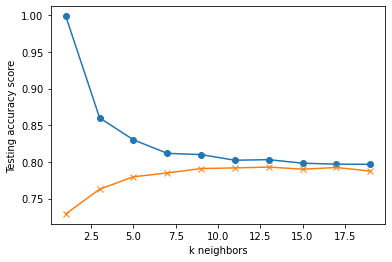

In [78]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k,weights='uniform', metric='minkowski')
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [94]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Train and fit the model using the training sets
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform', metric='minkowski')
knn.fit(X_train_scaled, y_train)

#Predict the response for test dataset
print(f'Training Score: {knn.score(X_train_scaled, y_train)}')
print(f'Testing Score: {knn.score(X_test_scaled, y_test)}')
y_pred_knn = knn.predict(test_df)
y_pred_knn.shape

# Numpy array to datafram
spaceship_df = pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred_knn})

# Change values to True, False
spaceship_df['Transported'] = spaceship_df.Transported.map({0:False, 1:True})
spaceship_df.to_csv('spaceship_knn.csv', index = False)

Training Score: 0.8030680728667305
Testing Score: 0.7929844738355377


## Robest Scaler in KNN

In [96]:

knn = KNeighborsClassifier(n_neighbors=22, weights='uniform', metric='minkowski')
knn.fit(X_train_rs, y_train)

print(f'Training Score: {knn.score(X_train_rs, y_train)}')
print(f'Testing Score: {knn.score(X_test_rs, y_test)}')
y_pred = knn.predict(test_df)

# Numpy array to datafram
spaceship_df = pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred_knn})

# Change values to True, False
spaceship_df['Transported'] = spaceship_df.Transported.map({0:False, 1:True})
spaceship_df.to_csv('spaceship_knn.csv', index = False)

Training Score: 0.8017257909875359
Testing Score: 0.7935595169637722


In [ ]:
# Automated Neural Network Model
import tensorflow as tf

# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation', ['relu','tanh', 'sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=9))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))
    
    # Output layer
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model


In [ ]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    factor = 4,
    max_epochs=20,
    hyperband_iterations=6)

In [ ]:
# # Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

In [ ]:
tuner.results_summary()

In [ ]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Create sequential model
model = tf.keras.models.Sequential()

# Create first layer of input
model.add(tf.keras.layers.Dense(units = 13, activation = 'relu', input_dim=9))

# Create hidden layers 
model.add(tf.keras.layers.Dense(units = 11, activation = 'relu'))

model.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

# model.add(tf.keras.layers.Dense(units = 11, activation = 'relu'))

# Create ouput layers
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Structure of sequential model
model.summary()

In [ ]:
# Compile the model
# lr = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, name='Adam')
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

# Fit the model
fit_model = model.fit(X_train_scaled, y_train, epochs = 20, validation_split=0.02) 

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_train_scaled,y_train,verbose=2)
print(f"Train Loss: {model_loss}, Train Accuracy: {model_accuracy}")
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Test Loss: {model_loss}, Test Accuracy: {model_accuracy}")

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")